In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.feature_selection import r_regression, f_regression
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.gridspec import GridSpec
from scipy.stats import f
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer
import statsmodels.api as sm
from scipy import stats
from scipy.stats import boxcox, yeojohnson
directory = 'data/graphs'
import os
if not os.path.exists(directory):
    os.makedirs(directory)

In [3]:
df = pd.read_csv("data/ModifiedSummaryByNeighborhood.csv") 

In [12]:
df

,er_visits,air_quality,asbestos,electrical,food,garbage,mold,rodent,smoking,felonies,misdemeanors,violations
0,192,1633,16,91,336,1544,3,177,101,1962,2696,607
1,188,942,18,74,501,1265,3,247,91,2459,3260,741
2,154,894,10,111,376,1488,6,284,106,2531,3315,703
3,173,959,14,77,469,1491,12,165,121,1631,2249,451
4,228,65,1,91,130,1479,0,169,38,1230,2395,458
...,...,...,...,...,...,...,...,...,...,...,...,...
163,325,26,8,194,82,2085,0,131,13,1064,1636,560
164,306,23,7,120,14,1356,0,47,3,453,684,351
165,363,21,18,77,22,917,2,49,4,546,934,432
166,309,13,3,141,38,1120,0,70,5,589,912,441


In [4]:
df.skew()

er_visits       0.932702
air_quality     6.111562
asbestos        0.543655
electrical      1.457983
food            2.531236
garbage         0.900626
mold            2.234371
rodent          1.298719
smoking         2.656977
felonies        0.471849
misdemeanors    0.367214
violations      0.562983
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   er_visits     168 non-null    int64
 1   air_quality   168 non-null    int64
 2   asbestos      168 non-null    int64
 3   electrical    168 non-null    int64
 4   food          168 non-null    int64
 5   garbage       168 non-null    int64
 6   mold          168 non-null    int64
 7   rodent        168 non-null    int64
 8   smoking       168 non-null    int64
 9   felonies      168 non-null    int64
 10  misdemeanors  168 non-null    int64
 11  violations    168 non-null    int64
dtypes: int64(12)
memory usage: 15.9 KB


#### Calculate feature correlations and display a correlation heat-map

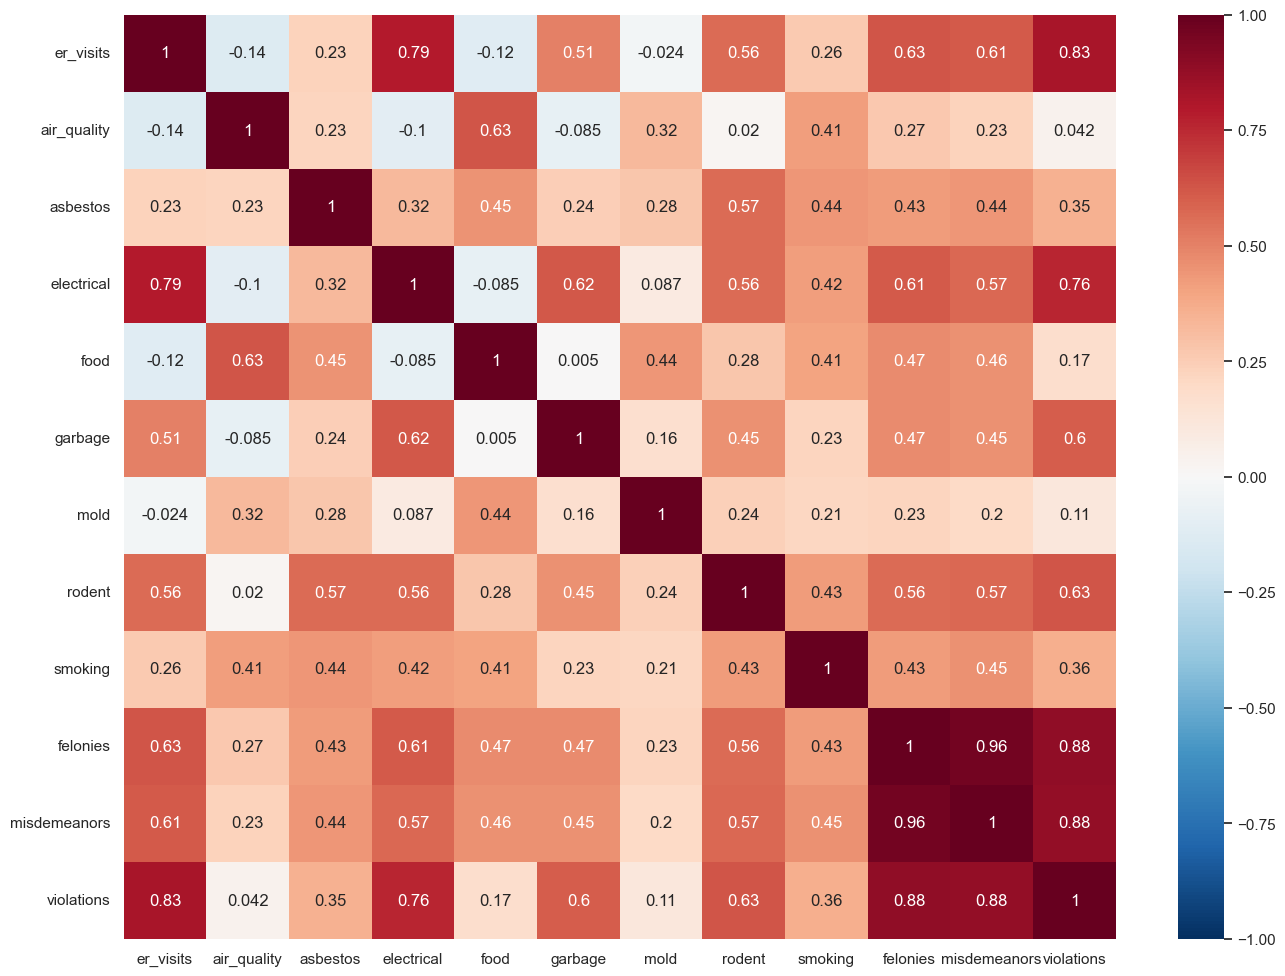

In [6]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
corr = df.corr(method='pearson')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);


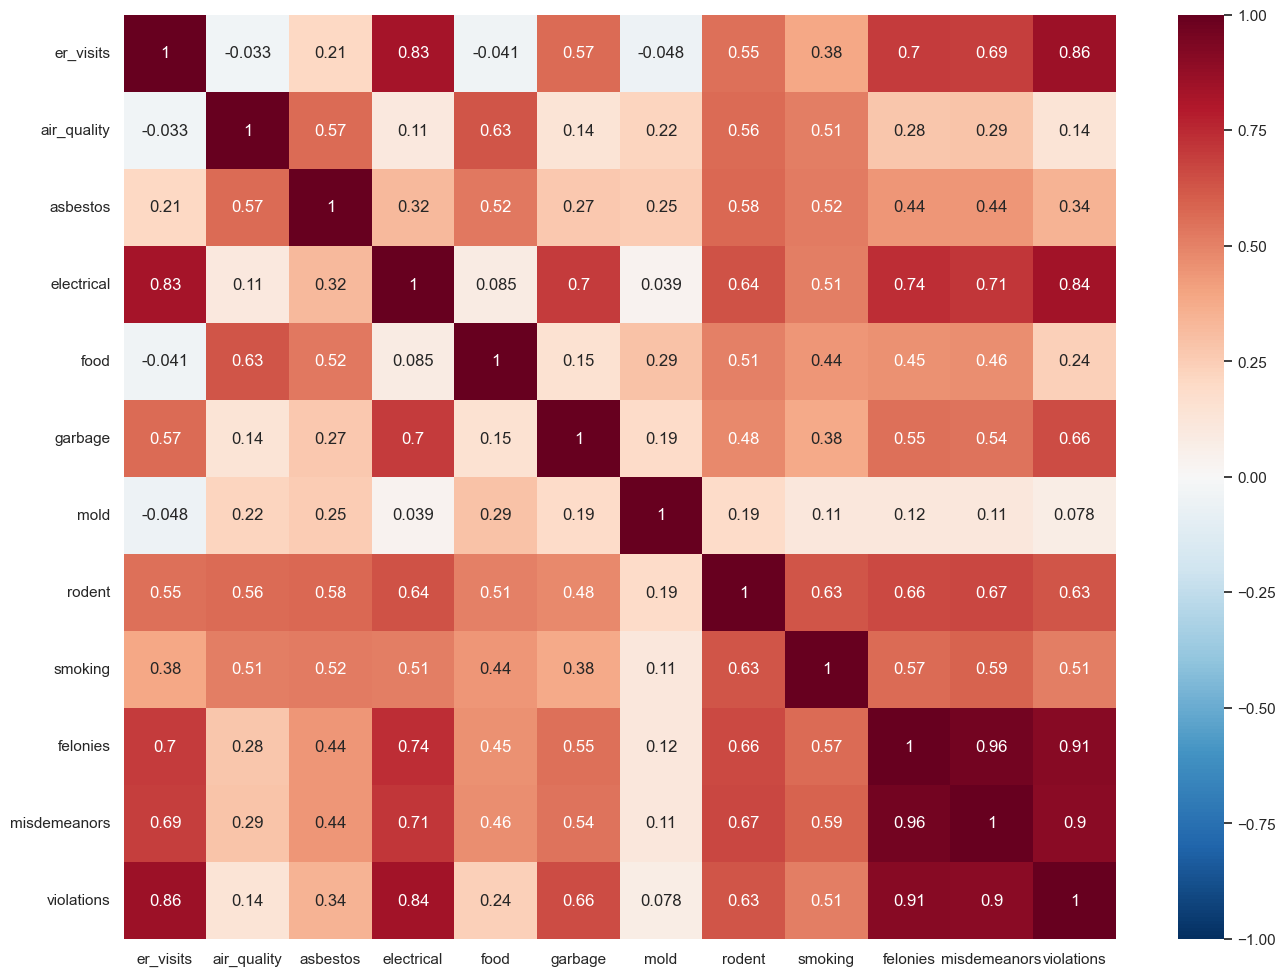

In [7]:
corr = df.corr(method='spearman')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

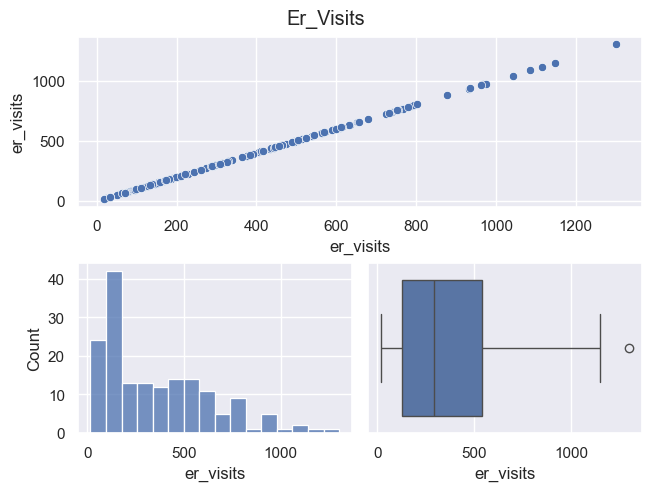

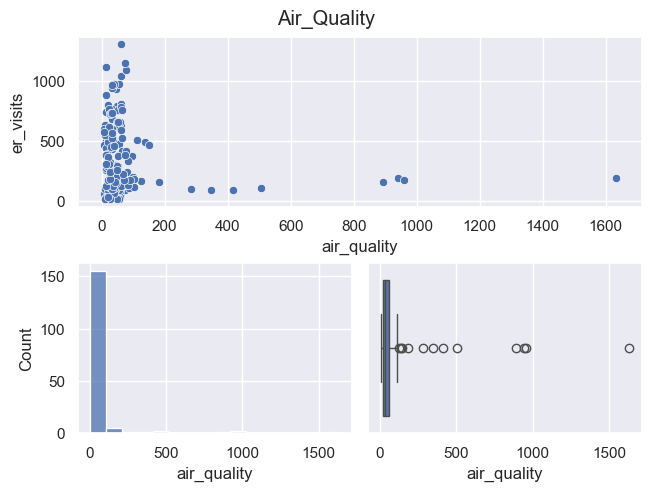

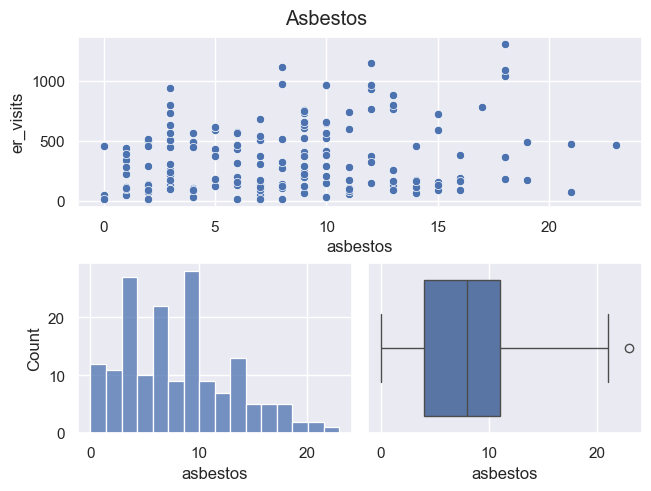

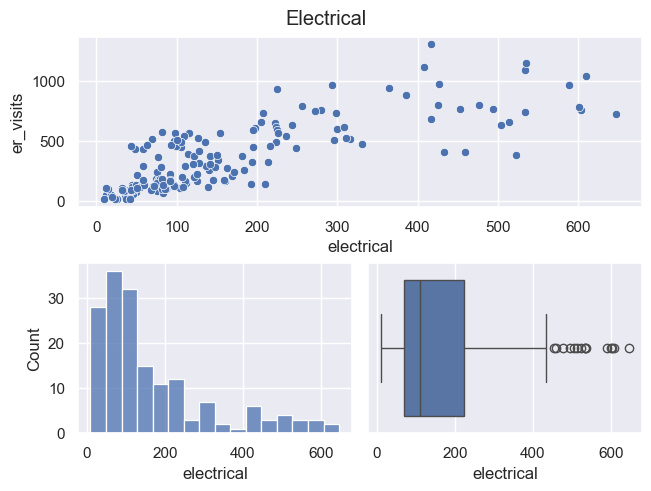

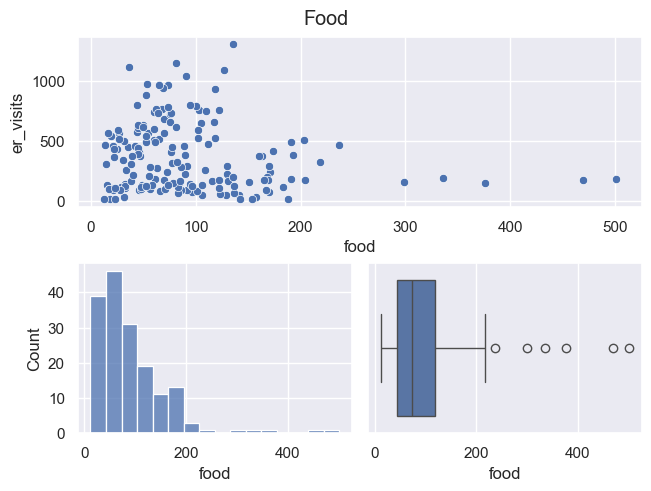

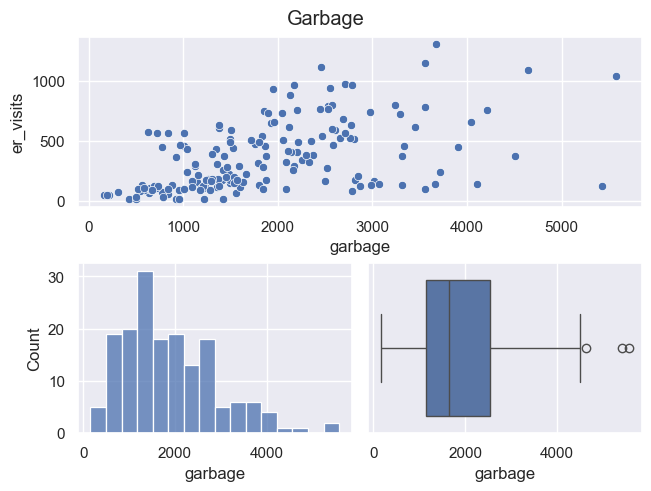

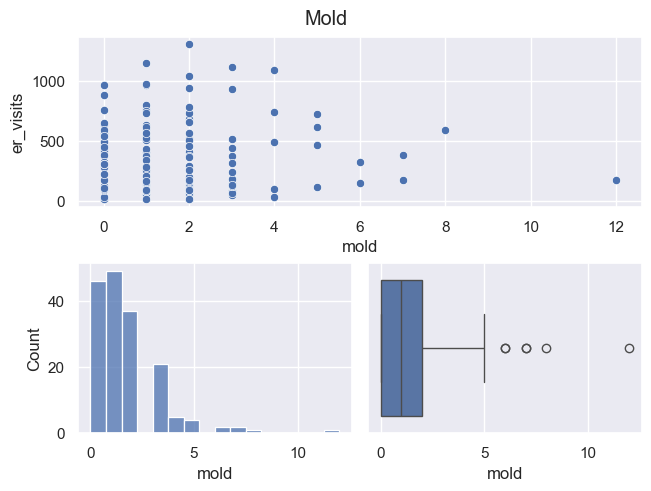

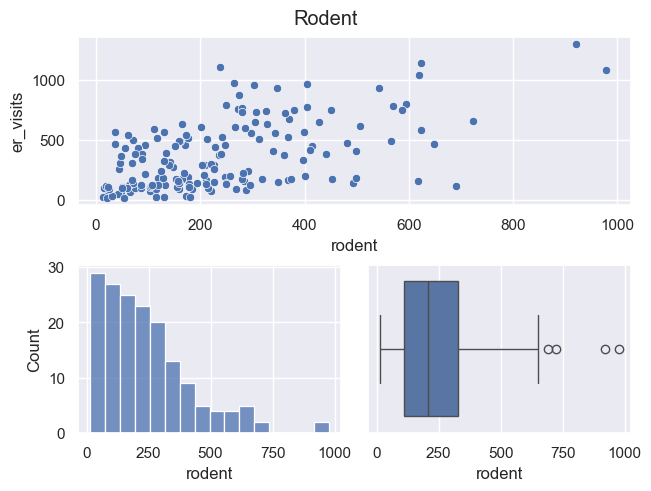

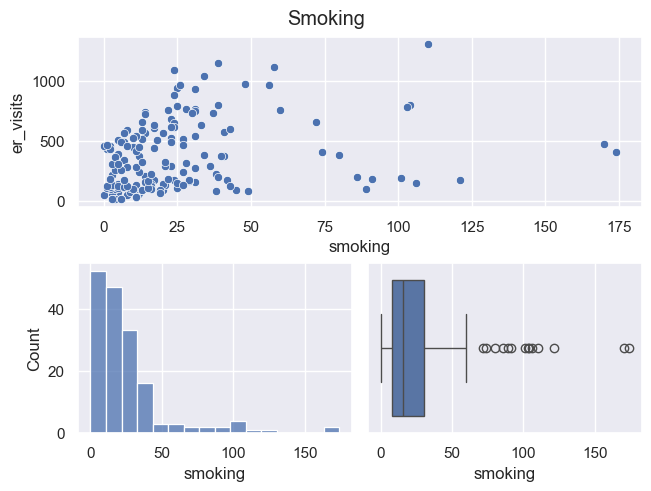

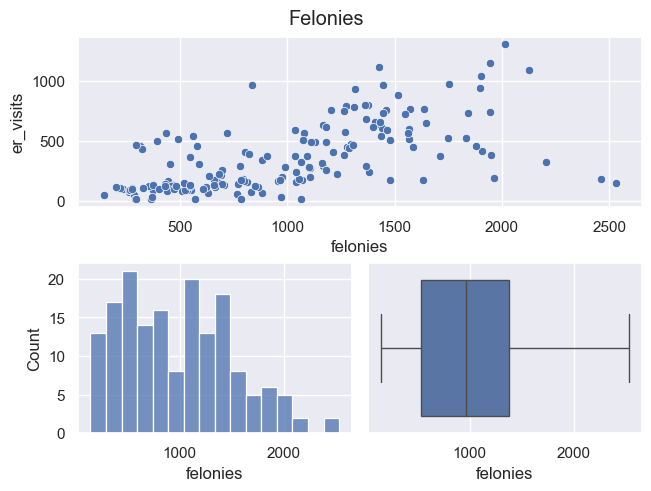

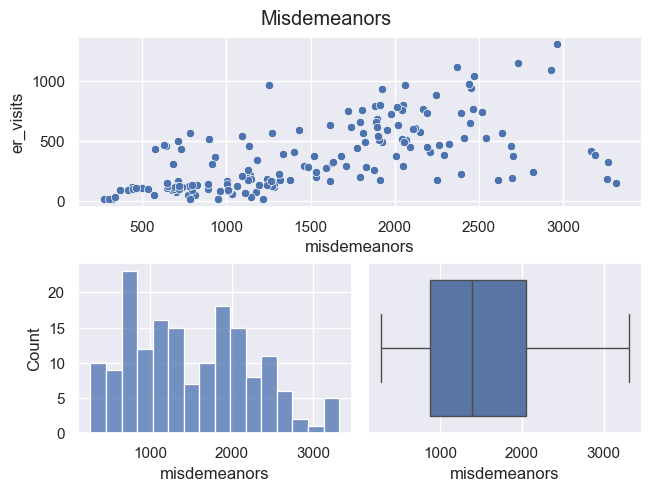

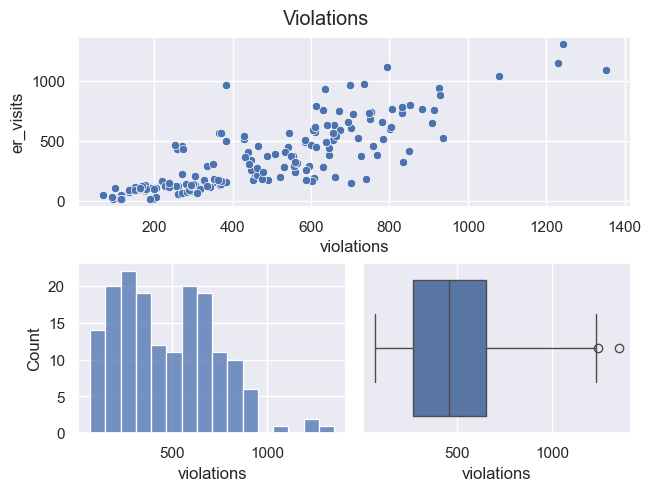

In [13]:
columns = df.columns
for idx in range(len(columns)):
    x_value = columns[idx]
    t_value = columns[idx].title()
    fig = plt.figure(constrained_layout=True)
    gs = GridSpec(2, 2, figure=fig)
    # create sub plots as grid
    ax1 = fig.add_subplot(gs[0, :])
    sns.scatterplot(data=df,x=x_value, y='er_visits')
    ax2 = fig.add_subplot(gs[1, 0])
    sns.histplot(x=x_value,data=df,bins=16)
    ax3 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=df,x=x_value,orient='h')
 
    # depict illustration
    fig.suptitle(t_value)
    fig.savefig('data/graphs/' + x_value + '.png', format='png')
    print('\n')

In [9]:
abs_corr = df.corr()['er_visits'].apply(lambda x: abs(x))
abs_corr.sort_values(ascending=False, inplace=True)
abs_corr.drop(index='er_visits', axis=1, inplace=True)

In [10]:
abs_corr

violations      0.826234
electrical      0.793777
felonies        0.628128
misdemeanors    0.612845
rodent          0.563376
garbage         0.507184
smoking         0.262010
asbestos        0.230972
air_quality     0.136577
food            0.124846
mold            0.023706
Name: er_visits, dtype: float64

In [10]:
violations_skew = df['violations'].skew()
electrical_skew = df['electrical'].skew()

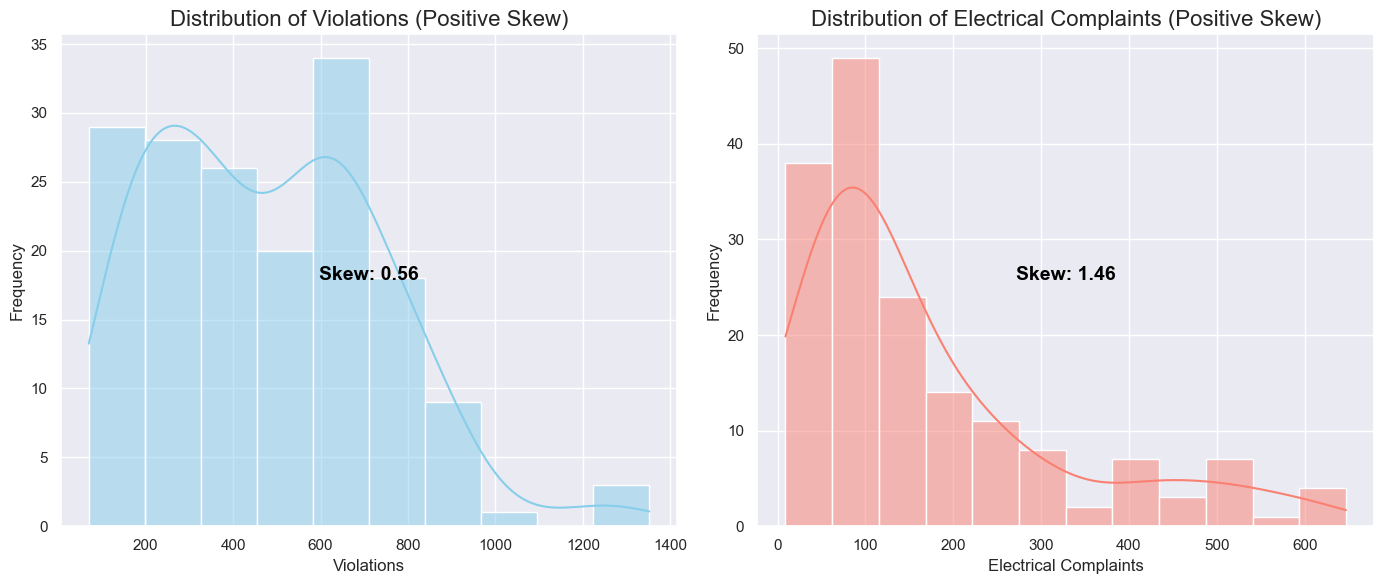

In [11]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
sns.histplot(df['violations'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Violations (Positive Skew)', fontsize=16)
ax[0].set_xlabel('Violations')
ax[0].set_ylabel('Frequency')
#Annotate Skewness
ax[0].text(0.5, 0.5, f'Skew: {violations_skew:.2f}', transform=ax[0].transAxes,
          horizontalalignment='center', color='black', weight='bold', fontsize=14)

sns.histplot(df['electrical'], kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Distribution of Electrical Complaints (Positive Skew)', fontsize=16)
ax[1].set_xlabel('Electrical Complaints')
ax[1].set_ylabel('Frequency')
#Annotate Skewness
ax[1].text(0.5, 0.5, f'Skew: {electrical_skew:.2f}', transform=ax[1].transAxes,
          horizontalalignment='center', color='black', weight='bold', fontsize=14)
plt.tight_layout()
plt.show()

#### Data Transformations ####
- Parametric tests expect a normal distribution
- Transformations can reduce the impact of outliers on models 

In [12]:
# Applying Log Transformation
df['log_violations'] = np.log(df['violations'])
print(f"Violations Skewness after Log Transformation: {df['log_violations'].skew():.5f}")
df['log_electrical'] = np.log(df['electrical'])
print(f"Electrical Skewness after Log Transformation: {df['log_electrical'].skew():.5f}")

Violations Skewness after Log Transformation: -0.55766
Electrical Skewness after Log Transformation: -0.20622


#### Moderate positive skew can be transformed by applying a square root to each data point

In [13]:
# Applying Square Root Transformation
df['sqrt_violations'] = np.sqrt(df['violations'])
print(f"Violations Skewness after Square Root Transformation: {df['sqrt_violations'].skew():.5f}")
df['sqrt_electrical'] = np.sqrt(df['electrical'])
print(f"Electrical Skewness after Square Root Transformation: {df['sqrt_electrical'].skew():.5f}")

Violations Skewness after Square Root Transformation: -0.00892
Electrical Skewness after Square Root Transformation: 0.78510


In [14]:
# Applying Box-Cox Transformation
df['bc_violations'],_ = boxcox(df['violations'])
print(f"Violations Skewness after Box-Cox Transformation: {df['bc_violations'].skew():.5f}")
df['bc_electrical'],_ = boxcox(df['electrical'])
print(f"Electrical Skewness after Box-Cox Transformation: {df['bc_electrical'].skew():.5f}")

Violations Skewness after Box-Cox Transformation: -0.07993
Electrical Skewness after Box-Cox Transformation: -0.00815


#### Note:  above transformations only work with positive data ####
The Yeo-Johnson and Quantile Transformers can handle negative data

In [15]:
# Applying Yeo-Johnson Transformation
df['yj_violations'],_ = yeojohnson(df['violations'])
print(f"Violations Skewness after Yeo-Johnson Transformation: {df['yj_violations'].skew():.5f}")
df['yj_electrical'],_ = yeojohnson(df['electrical'])
print(f"Electrical Skewness after Yeo-Johnson Transformation: {df['yj_electrical'].skew():.5f}")

Violations Skewness after Yeo-Johnson Transformation: -0.07946
Electrical Skewness after Yeo-Johnson Transformation: -0.00733


In [17]:
# Applying Quantile Transformation to follow a normal distribution
qv_transformer = QuantileTransformer(output_distribution="normal",n_quantiles=len(df['violations']), random_state=0)
df['q_violations'] = qv_transformer.fit_transform(df['violations'].values.reshape(-1,1)).flatten()
print(f"Violations Skewness after Quantile Transformation: {df['q_violations'].skew():.5f}")
qe_transformer = QuantileTransformer(output_distribution="normal",n_quantiles=len(df['electrical']), random_state=0)
df['q_electrical'] = qe_transformer.fit_transform(df['electrical'].values.reshape(-1,1)).flatten()
print(f"Electrical Skewness after Quantile Transformation: {df['q_electrical'].skew():.5f}")

Violations Skewness after Quantile Transformation: 0.00104
Electrical Skewness after Quantile Transformation: 0.00402


In [1]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
sns.histplot(df['q_violations'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Violations (After Quantile Transform)', fontsize=16)
ax[0].set_xlabel('Violations')
ax[0].set_ylabel('Frequency')
#Annotate Skewness
ax[0].text(0.5, 0.5, f"Skew: {df['q_violations'].skew():.5f}", transform=ax[0].transAxes,
          horizontalalignment='center', color='black', weight='bold', fontsize=14)

sns.histplot(df['q_electrical'], kde=True, ax=ax[1], color='salmon')
ax[1].set_title('Distribution of Electrical Complaints (After Quantile Transform)', fontsize=16)
ax[1].set_xlabel('Electrical Complaints')
ax[1].set_ylabel('Frequency')
#Annotate Skewness
ax[1].text(0.5, 0.5, f"Skew: {df['q_electrical'].skew():.5f}", transform=ax[1].transAxes,
          horizontalalignment='center', color='black', weight='bold', fontsize=14)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

#### For negative skewed data, try Squared  (raise each data point to the power of 2), Cubed, Box-Cox, Yeo-Johnson, and Quantile Transformations